# 機器學習百日馬拉松期中考 - Enron Fraud Dataset 安隆公司詐欺案資料集


比賽網址:https://www.kaggle.com/competitions/2020-ml100marathon-midterm/leaderboard

安隆公司曾是一間能源公司，2001 年破產前是世界上最大的電力、天然氣及電信公司之一。擁有上千億資產的公司於 2002 年竟然在短短幾周內宣告破產，才揭露其財報在多年以來均是造假的醜聞。在本資料集中你將會扮演偵探的角色，透過高層經理人內部的 mail 來往的情報以及薪資、股票等財務特徵，訓練出一個機器學習模型來幫忙你找到可疑的詐欺犯罪者是誰! 我們已經先幫你找到幾位犯罪者 (Person-of-Interest, poi) 與清白的員工，請利用這些訓練資料來訓練屬於自己的詐欺犯機器學習模型吧!

### 特徵說明

<li>有關財務的特徵: 
['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees'] (單位皆為美元)。更詳細的特徵說明請參考 enron61702insiderpay.pdf 的最後一頁(請至Data頁面參考該PDF檔)</li>

<li>有關 email 的特徵:
['to_messages', 'email_address', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi'] (除了 email_address，其餘皆為次數)</li>

<li>嫌疑人的標記，也就是我們常用的 **y**。POI label: [‘poi’] (boolean, represented as integer)</li>

<li>我們也建議你對既有特徵進行一些特徵工程如 rescale, transform ，也試著發揮想像力與創意，建立一些可以幫助找到嫌疑犯的特徵，增進模型的預測能力</li>

## STEP1:讀取資料

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [10]:
train = pd.read_csv('./train_data.csv')
test = pd.read_csv('./test_features.csv')
sample_submission = pd.read_csv('./sample_submission.csv')

In [11]:
print(train.columns, len(train.columns))
print(test.columns, len(test.columns))
print(sample_submission.columns, len(sample_submission.columns))

Index(['name', 'bonus', 'deferral_payments', 'deferred_income',
       'director_fees', 'email_address', 'exercised_stock_options', 'expenses',
       'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi',
       'loan_advances', 'long_term_incentive', 'other', 'poi',
       'restricted_stock', 'restricted_stock_deferred', 'salary',
       'shared_receipt_with_poi', 'to_messages', 'total_payments',
       'total_stock_value'],
      dtype='object') 22
Index(['name', 'bonus', 'deferral_payments', 'deferred_income',
       'director_fees', 'email_address', 'exercised_stock_options', 'expenses',
       'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi',
       'loan_advances', 'long_term_incentive', 'other', 'restricted_stock',
       'restricted_stock_deferred', 'salary', 'shared_receipt_with_poi',
       'to_messages', 'total_payments', 'total_stock_value'],
      dtype='object') 21
Index(['name', 'poi'], dtype='object') 2


'poi'(是否為詐欺犯)是預測目標

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       113 non-null    object 
 1   bonus                      61 non-null     float64
 2   deferral_payments          28 non-null     float64
 3   deferred_income            34 non-null     float64
 4   director_fees              13 non-null     float64
 5   email_address              83 non-null     object 
 6   exercised_stock_options    81 non-null     float64
 7   expenses                   73 non-null     float64
 8   from_messages              65 non-null     float64
 9   from_poi_to_this_person    65 non-null     float64
 10  from_this_person_to_poi    65 non-null     float64
 11  loan_advances              2 non-null      float64
 12  long_term_incentive        49 non-null     float64
 13  other                      69 non-null     float64

In [13]:
train.head()

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,RICE KENNETH D,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,...,1617011.0,174839.0,True,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,...,1920000.0,22122.0,True,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,SHELBY REX,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,...,NaN,1573324.0,True,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,KOPPER MICHAEL J,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,...,602671.0,907502.0,True,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,CALGER CHRISTOPHER F,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,...,375304.0,486.0,True,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0


In [14]:
train_Y = train['poi'] #預測目標
ids = test['name']  #最後繳交檔案時需要用到

#先合併訓練集跟測試集，等前處理和特徵工程處理完再做切分
train = train.drop(['name', 'poi'] , axis=1)
test = test.drop(['name'] , axis=1)
enron = pd.concat([train,test])

print(train.shape)
print(train_Y.shape)
print(test.shape)
print(enron.shape)

(113, 20)
(113,)
(33, 20)
(146, 20)


In [15]:
enron.to_csv('Enron Full Data.csv')

### 試作Baseline model

In [16]:
#最簡易的資料前處理

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
LEncoder = LabelEncoder()
MMEncoder = MinMaxScaler()

for c in enron.columns:
    
    enron[c] = enron[c].fillna(-1)
    
    if enron[c].dtype == 'object':
        enron[c] = LEncoder.fit_transform(list(enron[c].values))
        
    enron[c] = MMEncoder.fit_transform(enron[c].values.reshape(-1, 1))
    
enron.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,0.017978,0.003185,0.874812,0.0,0.504505,0.063491,0.008968,0.001322,0.081285,0.008197,0.0,0.033325,0.004098,0.040269,0.328952,0.015752,0.156646,0.059802,0.001630,0.051977
1,0.057528,0.003185,1.000000,0.0,0.324324,0.061745,0.005604,0.007586,0.168242,0.050820,0.0,0.039570,0.000518,0.071078,0.328952,0.041614,0.369975,0.239472,0.028019,0.060149
2,0.002055,0.003185,0.999851,0.0,0.747748,0.005210,0.004371,0.002784,0.026465,0.024590,0.0,0.000000,0.036874,0.026133,0.328952,0.007933,0.016661,0.014917,0.006467,0.005840
3,0.008218,0.003185,1.000000,0.0,0.657658,0.000000,0.022566,0.000000,0.000000,0.000000,0.0,0.012421,0.021269,0.027004,0.328952,0.008400,0.000000,0.000000,0.008560,0.002368
4,0.012841,0.003185,0.990623,0.0,0.090090,0.000000,0.006842,0.010091,0.378072,0.042623,0.0,0.007735,0.000011,0.020542,0.328952,0.008994,0.396414,0.171551,0.005290,0.000391


In [17]:
train_num = train_Y.shape[0]   #113筆
train_X = enron[:train_num]
test_X = enron[train_num:]

print(train_X.shape)
print(test_X.shape)

(113, 20)
(33, 20)


In [18]:
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestClassifier

# 建立模型 (使用 20 顆樹，每棵樹的最大深度為 4)
clf = RandomForestClassifier(n_estimators=20, max_depth=4, oob_score=True)

# 訓練模型
clf.fit(train_X, train_Y)

# 預測測試集
y_pred = clf.predict_proba(test_X)[:,1]
print(y_pred)

[0.36479167 0.26885649 0.33574421 0.09543403 0.35232762 0.17768398
 0.59101732 0.00252525 0.02513022 0.07113636 0.0326634  0.00252525
 0.0049062  0.00252525 0.35824421 0.00252525 0.06827922 0.30741087
 0.00863636 0.01002525 0.71071429 0.22668403 0.00274927 0.06002525
 0.00274927 0.05513022 0.17572872 0.01002525 0.28142857 0.3032388
 0.02252525 0.07827922 0.22374286]


In [19]:
sub = pd.DataFrame({'name': ids, 'poi': y_pred})
sub['poi'] = sub['poi'].map(lambda x:1 if x>0.5 else 0) 
sub.to_csv('EnronFraud_submission v1.0.csv', index=False)

In [20]:
sub

,name,poi
0,BELDEN TIMOTHY N,0
1,BOWEN JR RAYMOND M,0
2,HANNON KEVIN P,0
3,DELAINEY DAVID W,0
4,CAUSEY RICHARD A,0
5,HICKERSON GARY J,0
6,FREVERT MARK A,1
7,CHAN RONNIE,0
8,DONAHUE JR JEFFREY M,0
9,REYNOLDS LAWRENCE,0


### Baseline Score: 0.46428

## STEP2:資料前處理

### 2-1遺失值處理

In [67]:
enron.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 32
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   bonus                      82 non-null     float64
 1   deferral_payments          39 non-null     float64
 2   deferred_income            49 non-null     float64
 3   director_fees              17 non-null     float64
 4   email_address              111 non-null    object 
 5   exercised_stock_options    102 non-null    float64
 6   expenses                   95 non-null     float64
 7   from_messages              86 non-null     float64
 8   from_poi_to_this_person    86 non-null     float64
 9   from_this_person_to_poi    86 non-null     float64
 10  loan_advances              4 non-null      float64
 11  long_term_incentive        66 non-null     float64
 12  other                      93 non-null     float64
 13  restricted_stock           110 non-null    float64


In [68]:
enron.to_csv('fullData.csv')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
import seaborn as sns

fullData = pd.read_csv('./fullData.csv')
fullData.head()

Populating the interactive namespace from numpy and matplotlib


,Unnamed: 0,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,0,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,...,NaN,1617011.0,174839.0,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,1,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,...,NaN,1920000.0,22122.0,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,2,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,...,NaN,NaN,1573324.0,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,3,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,...,NaN,602671.0,907502.0,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,4,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,...,NaN,375304.0,486.0,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0


In [3]:
enron = fullData.copy()

In [4]:
def na_check(df_data):
    data_na = (df_data.isnull().sum() / len(df_data)) * 100 #遺失值的比例
    data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False) #把遺失比率=0的欄位剔除、將資料由遺失比率高至低排序
    missing_data = pd.DataFrame({'Missing Ratio' :data_na})
    display(missing_data)
    
na_check(enron)

,Missing Ratio
loan_advances,97.260274
director_fees,88.356164
restricted_stock_deferred,87.671233
deferral_payments,73.287671
deferred_income,66.438356
long_term_incentive,54.794521
bonus,43.835616
from_messages,41.095890
from_poi_to_this_person,41.095890
from_this_person_to_poi,41.095890


<strong>1.遺失比率過高的欄位</strong>
<li>"restricted_stock_deferred" 87.67%</li>
<li>"loan_advances" 97.26%</li>
<li>"director_fees" 88.35%</li>
<br>

<strong>2.跟郵件使用行為有關的欄位</strong>
<li>"shared_receipt_with_poi"%</li>
<li>"to_messages"%</li>
<li>"from_messages"%</li>
<li>"from_this_person_to_poi"%</li>
<li>"from_poi_to_this_person"%</li>
<br>

<strong>3.跟金錢有關的欄位</strong>
<li>"salary"</li>
<li>"total_payments"</li>
<li>"exercised_stock_options"</li>
<li>"bonus"</li>
<li>"restricted_stock"</li>
<li>"total_stock_value"</li>

### 2-2 離群值處理

In [72]:
## 先篩選出數值型的特徵欄位
dtype_select = [np.dtype('int64'), np.dtype('float64')]
print(train.dtypes.isin(dtype_select))

bonus                         True
deferral_payments             True
deferred_income               True
director_fees                 True
email_address                False
exercised_stock_options       True
expenses                      True
from_messages                 True
from_poi_to_this_person       True
from_this_person_to_poi       True
loan_advances                 True
long_term_incentive           True
other                         True
restricted_stock              True
restricted_stock_deferred     True
salary                        True
shared_receipt_with_poi       True
to_messages                   True
total_payments                True
total_stock_value             True
dtype: bool


In [73]:
## 過濾出所有為數值型的特徵
numeric_columns = list(train.columns[list(train.dtypes.isin(dtype_select))])
numeric_columns

['bonus',
 'deferral_payments',
 'deferred_income',
 'director_fees',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'loan_advances',
 'long_term_incentive',
 'other',
 'restricted_stock',
 'restricted_stock_deferred',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value']

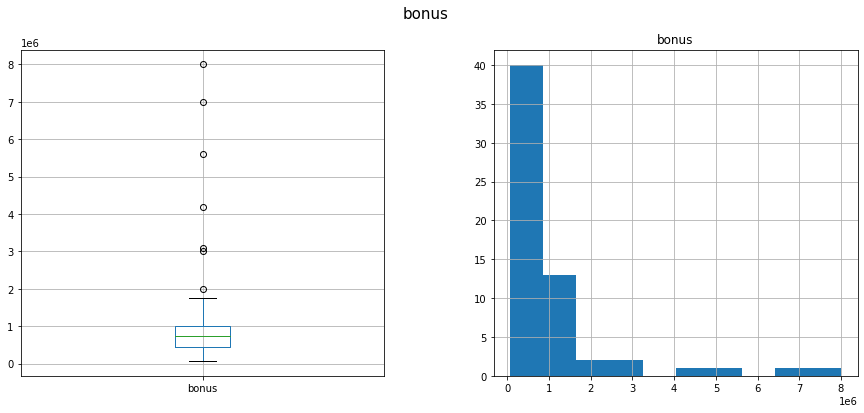

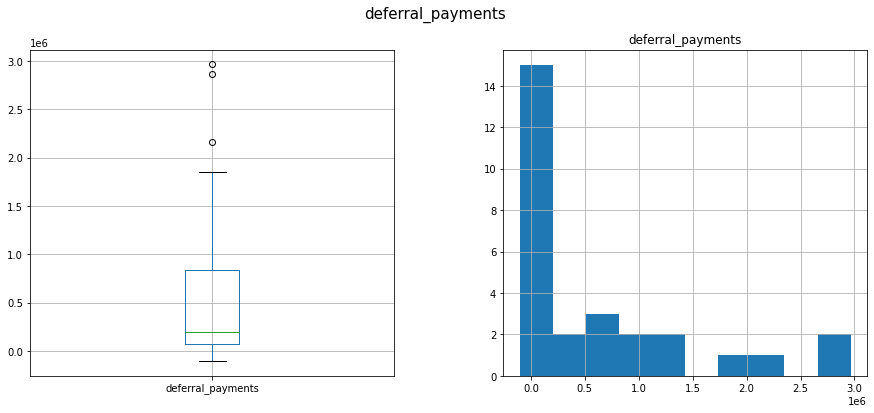

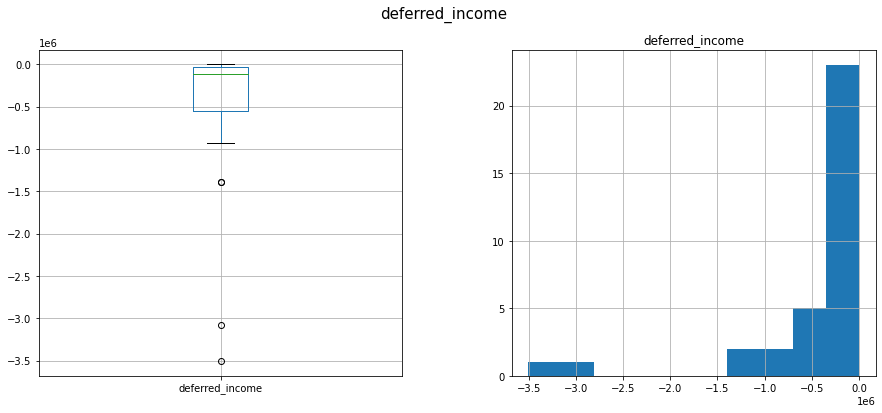

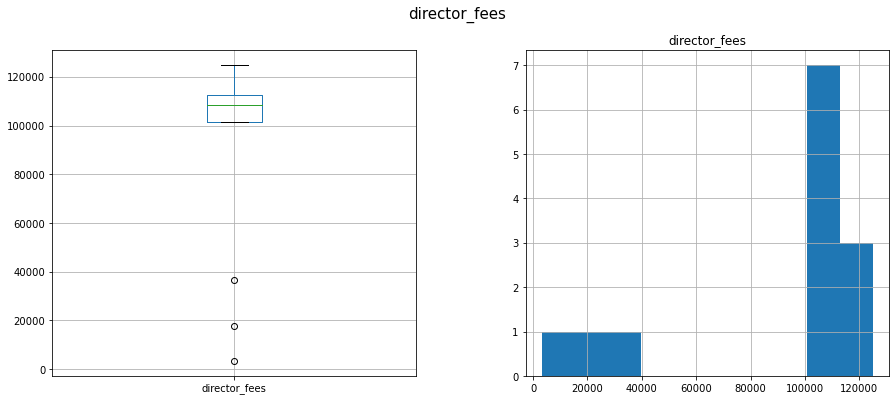

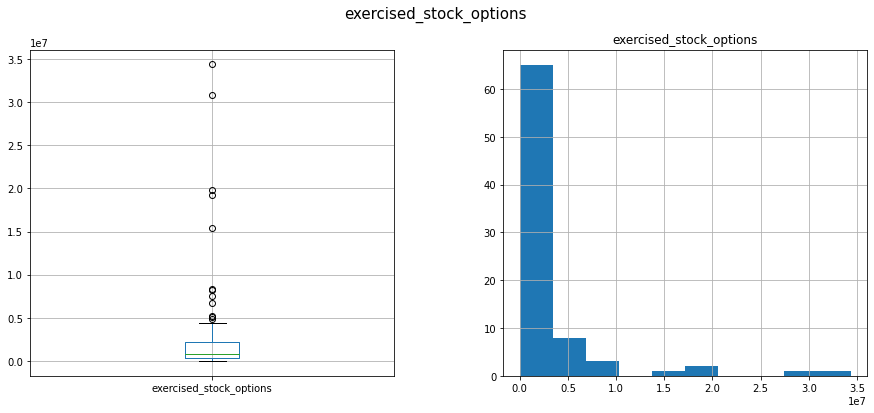

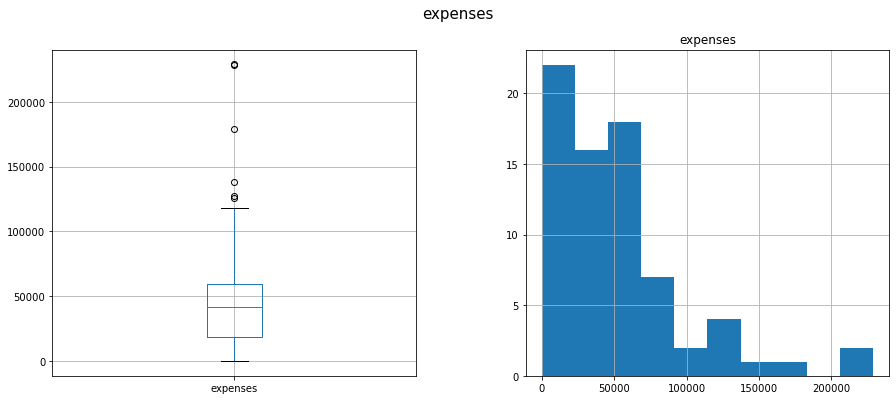

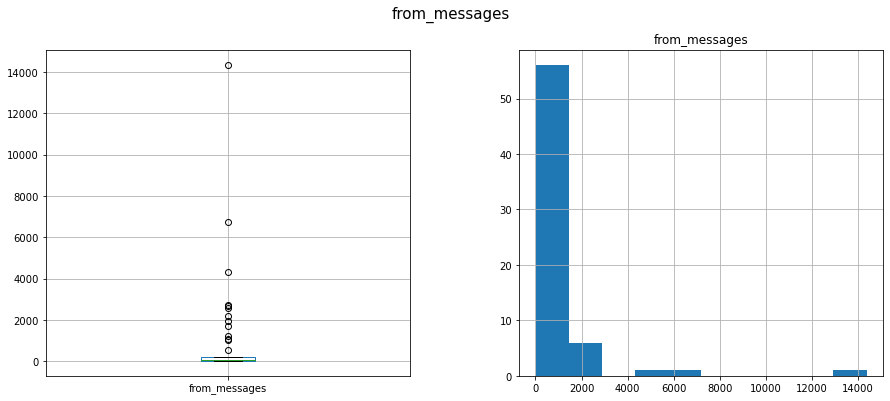

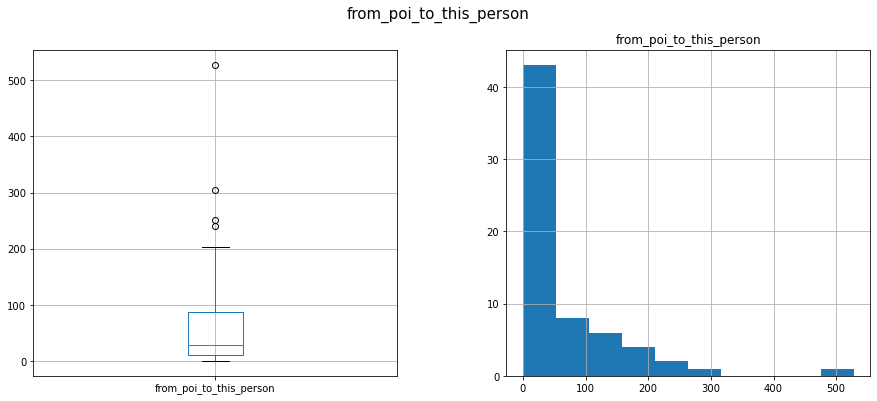

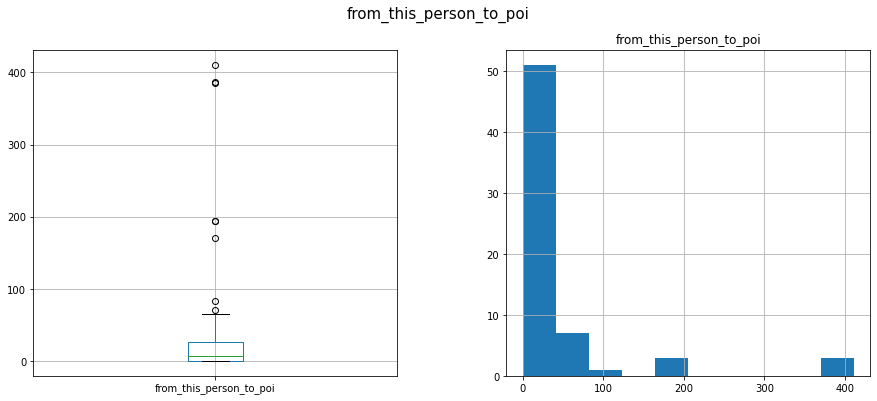

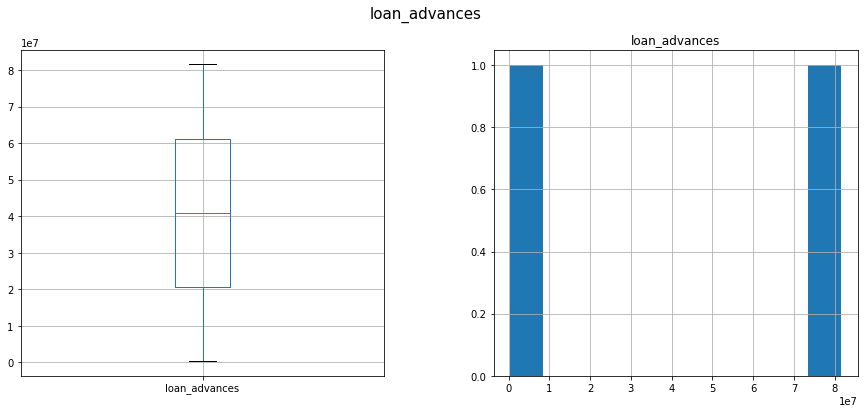

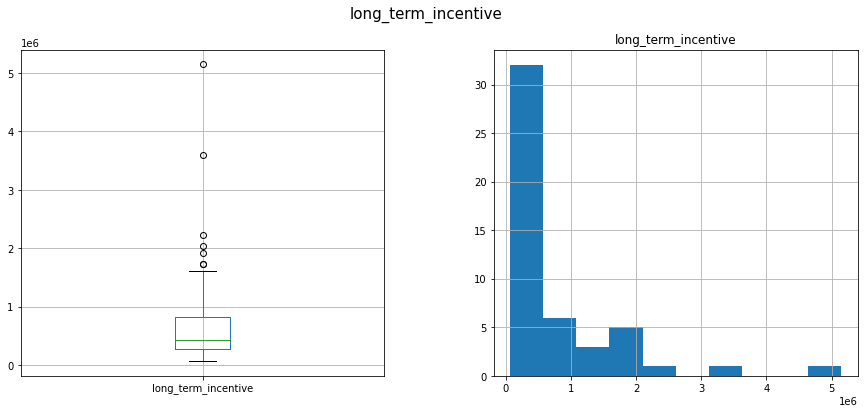

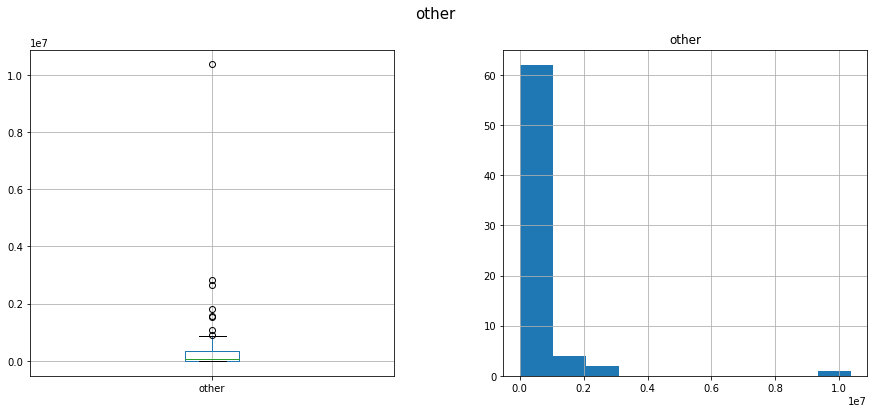

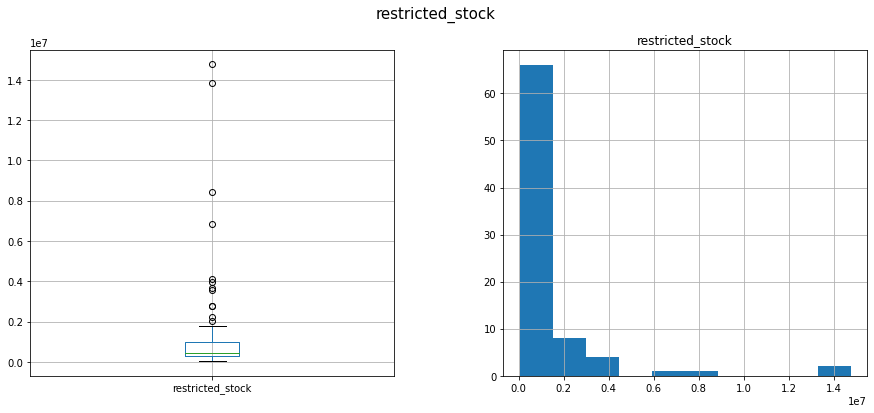

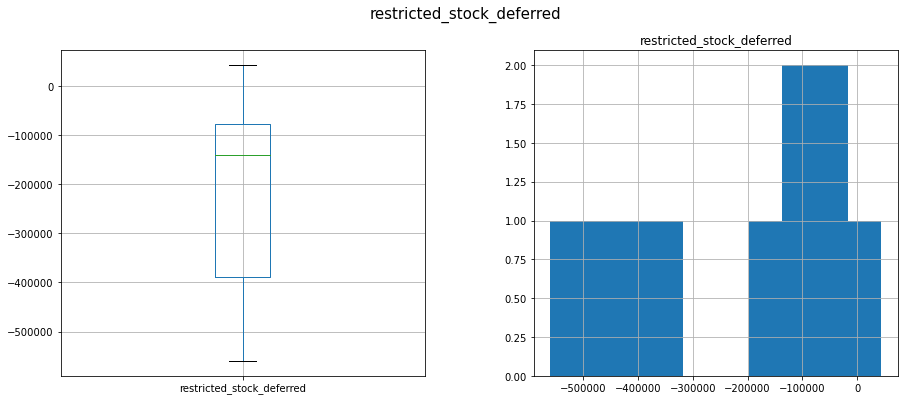

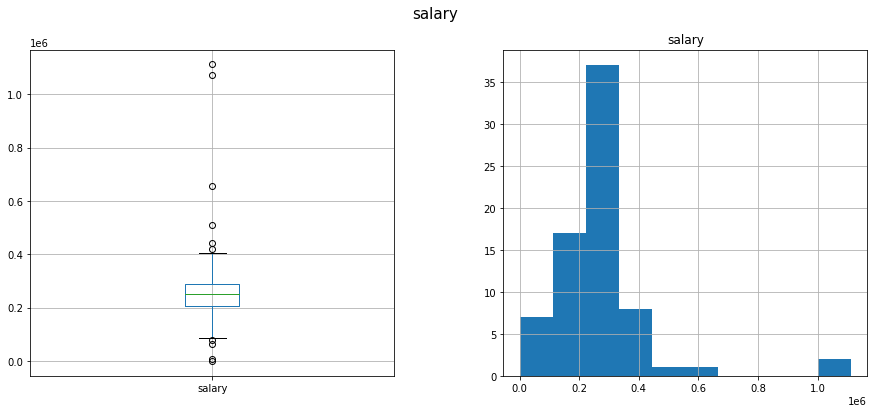

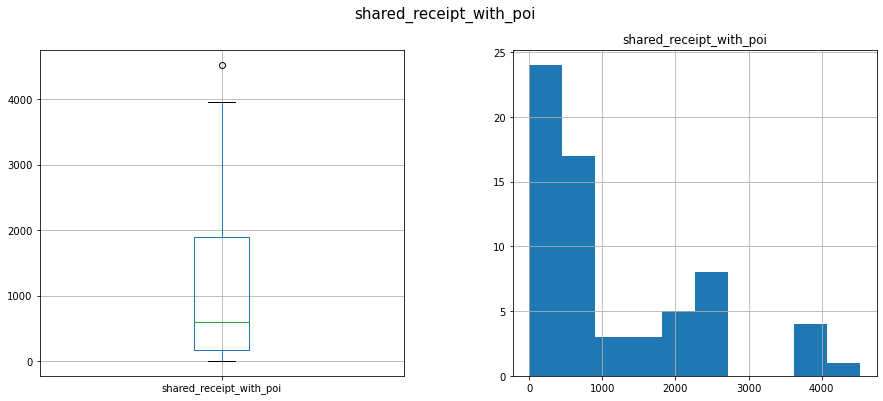

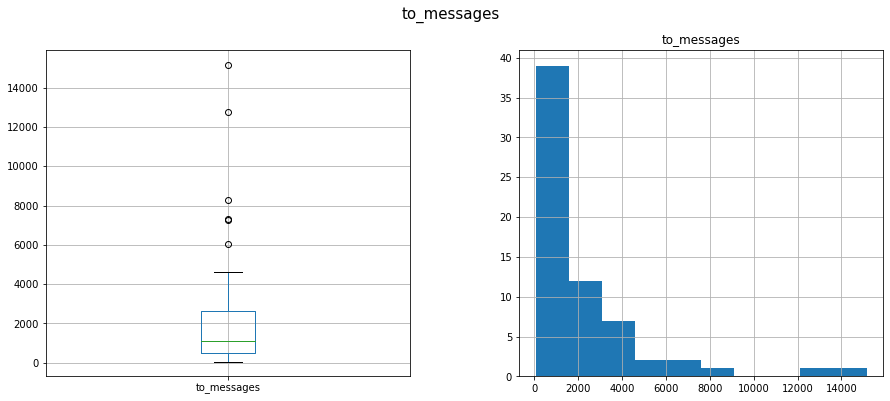

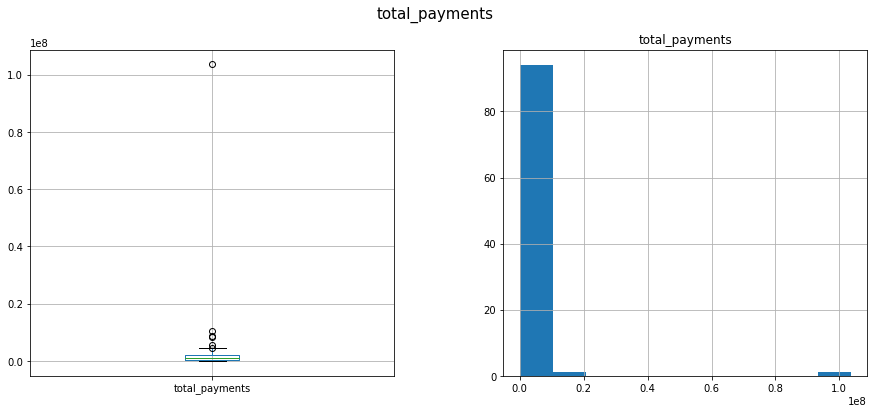

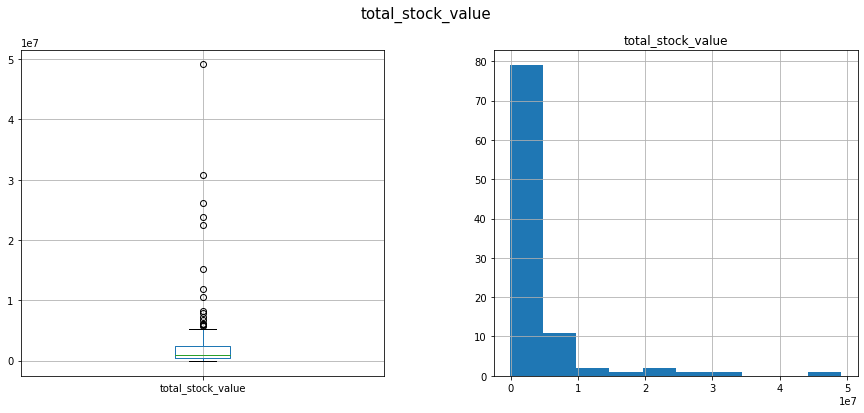

In [74]:
for col in numeric_columns:
    fig = plt.figure(figsize = (15, 6))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    
    train.boxplot(column = col, ax = ax1)
    train.hist(column = col, ax = ax2)
    plt.suptitle(col,fontsize=15)   #所有子圖設定一個主標題 
    # https://www.delftstack.com/zh-tw/howto/matplotlib/how-to-set-a-single-main-title-for-all-the-subplots-in-matplotlib/
    plt.show();

## STEP3:特徵工程

### 特徵選擇

In [69]:
features_full_list = enron.columns.tolist()
#features_full_list

#features_full_list.remove('name')#take out 'name'
features_full_list.remove('email_address') #take out 'email_address'
features_full_list.remove('loan_advances') #take out 'loan_advances' because of missing values
features_full_list.remove('director_fees')#take out 'director_fees' because of missing values
#features_full_list.remove('poi') #take out 'poi' for now and add to beginning of list

features_full_list

['bonus',
 'deferral_payments',
 'deferred_income',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'long_term_incentive',
 'other',
 'restricted_stock',
 'restricted_stock_deferred',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value']

In [70]:
enron_data = enron[features_full_list]

In [71]:
# 遺失值填補:
enron_data = enron_data.fillna(0)
enron_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 32
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   bonus                      146 non-null    float64
 1   deferral_payments          146 non-null    float64
 2   deferred_income            146 non-null    float64
 3   exercised_stock_options    146 non-null    float64
 4   expenses                   146 non-null    float64
 5   from_messages              146 non-null    float64
 6   from_poi_to_this_person    146 non-null    float64
 7   from_this_person_to_poi    146 non-null    float64
 8   long_term_incentive        146 non-null    float64
 9   other                      146 non-null    float64
 10  restricted_stock           146 non-null    float64
 11  restricted_stock_deferred  146 non-null    float64
 12  salary                     146 non-null    float64
 13  shared_receipt_with_poi    146 non-null    float64


### 特徵縮放

In [56]:
# 將資料最大最小化
from sklearn.preprocessing import MinMaxScaler
enron_data = MinMaxScaler().fit_transform(enron_data)

## STEP5:建立模型

In [57]:
enron_data

array([[0.01797755, 0.00318462, 0.87481157, ..., 0.05973992, 0.00162979,
        0.05197663],
       [0.05752817, 0.00318462, 1.        , ..., 0.23942174, 0.02801901,
        0.06014854],
       [0.00205458, 0.00318462, 0.99985114, ..., 0.01485247, 0.00646651,
        0.00583981],
       ...,
       [0.        , 0.01886261, 1.        , ..., 0.01115585, 0.00311895,
        0.00520619],
       [0.00205458, 0.00952513, 1.        , ..., 0.        , 0.00282648,
        0.00715286],
       [0.02670951, 0.00318462, 1.        , ..., 0.15545581, 0.01322991,
        0.00392805]])

In [67]:
# 將前述轉換完畢資料 df , 重新切成 train_X, test_X
train_num = train_Y.shape[0]
train_X = enron_data[:train_num]
test_X = enron_data[train_num:]

print(train_X.shape)
print(test_X.shape)

(113, 17)
(33, 17)


In [68]:
train_Y

0       True
1       True
2       True
3       True
4       True
       ...  
108    False
109    False
110    False
111    False
112    False
Name: poi, Length: 113, dtype: bool

### 1.使用隨機森林模型

In [64]:
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestClassifier

# 建立模型 (使用 20 顆樹，每棵樹的最大深度為 4)
clf = RandomForestClassifier(n_estimators=20, max_depth=4, oob_score=True)

# 訓練模型
clf.fit(train_X, train_Y)

# 預測測試集
y_pred = clf.predict_proba(test_X)[:,1]
print(y_pred)

[0.4474655  0.26655956 0.34470359 0.04342624 0.28194089 0.21808134
 0.55625    0.05540805 0.16326188 0.04862112 0.03607739 0.00387296
 0.00534355 0.00540805 0.16556908 0.00387296 0.08217572 0.23205245
 0.14326768 0.00679693 0.78333333 0.33599537 0.07707471 0.01407566
 0.01457471 0.01521197 0.05657566 0.02887296 0.12142663 0.25441434
 0.00679693 0.04283297 0.21486643]


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:489: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curren

In [79]:
test_X['poi'] = test_X['poi'].map(lambda x:1 if x==True else 0) 
test_X

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
acc = metrics.accuracy_score(test, y_pred)
print("Accuracy: ", acc)